<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Semana%207%20/Regresi%C3%B3n_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semanal - 7**

**Alumno:** Jesús Angel Rincón Ruiz

**Matricula:** A01793960

**Objetivos:**

Entender métodos de Regresiones y K means.

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [4]:
X = df[["Number of Units"]]
y = df[["Manufacturing Cost"]]

In [5]:
len (X)

1000

In [6]:
y.describe()

,Manufacturing Cost
count,1000.000000
mean,40.052999
std,10.595322
min,20.000000
25%,32.912036
50%,38.345781
75%,44.531822
max,100.000000


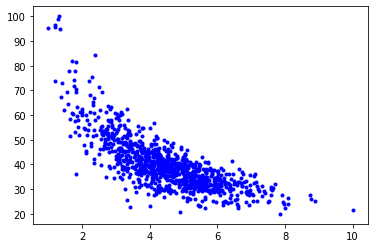

In [7]:
plt.plot(X,y, "b.")

**1.1 Divide los datos del costo de manufactura.** 

Utiliza la función train_test_split (viene el ejemplo al final del notebook)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

**1.2 Regresión Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada. 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [12]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
yhat = linear_reg.predict(X_train)
yhat[0:5]

array([[39.28239104],
       [45.34361759],
       [48.6471974 ],
       [33.00334836],
       [35.81416506]])

In [14]:
linear_reg.intercept_

array([66.97622862])

In [15]:
linear_reg.coef_

array([[-6.00034747]])

**Modelo generado** 

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

por lo que tendriamos:

**Manufacturing Cost** =  -6.218 x **Number of units** + 67.890 

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


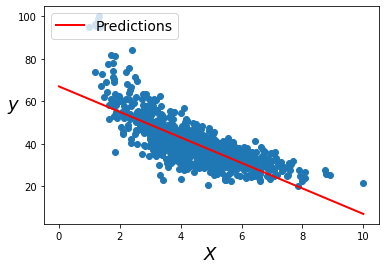

In [16]:
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores y R^2**

In [17]:
yhat_test = linear_reg.predict(X_test)
yhat_train = linear_reg.predict(X_train)

In [18]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
print('r2_score',r2_score(y_test, yhat_test))


Error medio Absoluto (MAE): 4.642590742422353
Root Mean Squared Error: 6.767304611023221
r2_score 0.5725182609536665


**Regresión Polinomial**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly =  poly_features.fit_transform(X_test)


In [21]:
X_train_poly

array([[  4.61537231,  21.30166155,  98.31509886],
       [  3.60522638,  12.99765728,  46.85949696],
       [  3.05466163,   9.3309577 ,  28.50291849],
       ...,
       [  1.62030979,   2.62540381,   4.2539675 ],
       [  6.09889652,  37.19653874, 226.85784059],
       [  3.18717054,  10.15805604,  32.37545696]])

In [59]:
lin_reg_poly = LinearRegression(fit_intercept=True)
lin_reg_poly.fit(X_train_poly, y_train)
lin_reg_poly.coef_, lin_reg_poly.intercept_

(array([[-32.47619927,   4.66666739,  -0.2388345 ]]), array([110.87955456]))

**Modelo generado** 

$\hat{y} = 110.879 -32.476X + 4.666X^2  -0.238X^3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


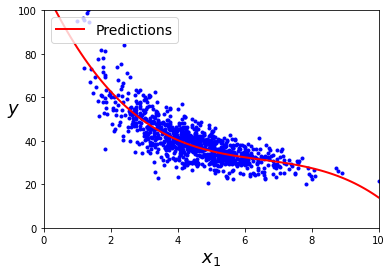

In [23]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

**Errores y R^2**

In [58]:
y_poly_pred = lin_reg_poly.predict(X_test_poly)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_poly_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))
print('r2_score',r2_score(y_test, y_poly_pred))


Error medio Absoluto (MAE): 4.326897810390827
Root Mean Squared Error: 5.871683937053899
r2_score 0.6781811660294619


**Ridge y Lasso**

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [53]:
#RIDGE

RidgeModel = Ridge(alpha =1)
RidgeModel.fit(X_train, y_train)
y_predict_ridge = RidgeModel.predict(X_test)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_predict_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge)))
print('r2_score',r2_score(y_test, y_predict_ridge))



Error medio Absoluto (MAE): 4.642319499964093
Root Mean Squared Error: 6.767480426464915
r2_score 0.5724960486043214


In [55]:
RidgeModel.coef_,RidgeModel.intercept_


(array([[-5.99624726]]), array([66.95781558]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


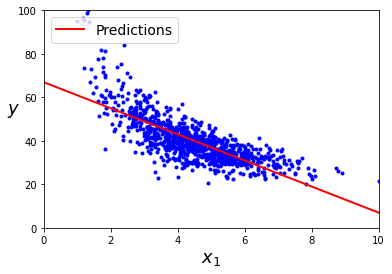

In [65]:
X_ridge=np.linspace(0, 10, 100).reshape(100, 1)
y_ridge= RidgeModel.predict(X_ridge)


plt.plot(X, y, "b.")
plt.plot(X_ridge, y_ridge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [49]:
#LASSO


modelLasso = Lasso(alpha=0.02)
modelLasso.fit(X_train, y_train)
y_predict_lasso = modelLasso.predict(X_test)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_predict_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso)))
print('r2_score',r2_score(y_test, y_predict_lasso))


Error medio Absoluto (MAE): 4.641872629230551
Root Mean Squared Error: 6.767782627882894
r2_score 0.5724578674270739


In [56]:
modelLasso.coef_,modelLasso.intercept_

(array([-5.98940673]), array([66.92709644]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


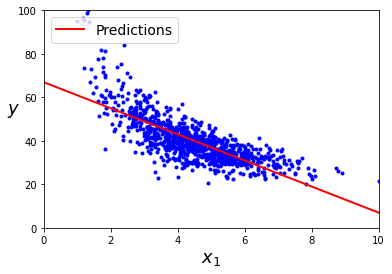

In [66]:
X_lasso=np.linspace(0, 10, 100).reshape(100, 1)
y_lasso= RidgeModel.predict(X_lasso)


plt.plot(X, y, "b.")
plt.plot(X_lasso, y_lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

DE acuerdo al resumen de Error y R^2

Lineal

Error medio Absoluto (MAE): 4.642590742422353
Root Mean Squared Error: 6.767304611023221
r2_score 0.5725182609536665

-------------------------------------------

Polinomial

Error medio Absoluto (MAE): 4.326897810390827
Root Mean Squared Error: 5.871683937053899
r2_score 0.6781811660294619

---------------------------------------------

Ridge

Error medio Absoluto (MAE): 4.642319499964093
Root Mean Squared Error: 6.767480426464915
r2_score 0.5724960486043214

--------------------------------------------
Lasso

Error medio Absoluto (MAE): 4.641872629230551
Root Mean Squared Error: 6.767782627882894
r2_score 0.5724578674270739


# Resultado

De acuerdo a los resultados el metodo que mas le coviene a la empresa es el **polinomial** ya que tiene un menor MEA y una **R^2 que describe el 67% de nuestros datos** mientras que para el modelo lineal, Ridge y Lasso esta por debajo del 60%.
El entrenamiento fue realizado con el 80% de los datos 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14984,4136960010,20150327T000000,480000.0,5,3.50,3480,12821,2.0,0,2,...,10,2890,590,2004,0,98092,47.2641,-122.215,3400,9870
14107,2473002060,20140519T000000,442500.0,3,1.75,1800,10200,1.0,0,0,...,8,1800,0,1967,0,98058,47.4496,-122.146,2140,10128
1701,8080400045,20140620T000000,600000.0,2,1.00,1040,3600,1.0,0,0,...,7,1040,0,1919,1980,98112,47.6190,-122.311,2250,4800
5570,1735800050,20150409T000000,142500.0,1,1.00,690,6825,1.0,0,0,...,5,690,0,1917,0,98002,47.3109,-122.225,1330,5381
19601,522059189,20150417T000000,235000.0,3,1.00,1460,8400,1.0,0,0,...,7,1460,0,1958,0,98055,47.4243,-122.198,1460,9600
14852,5153200150,20141203T000000,345000.0,2,1.00,1770,16660,1.0,0,3,...,8,1220,550,1957,0,98023,47.3346,-122.354,2790,20504
9211,1726069198,20140918T000000,850000.0,3,2.50,3260,91911,2.0,0,0,...,9,3260,0,1984,0,98077,47.7370,-122.074,2520,65775
16293,5037300130,20150504T000000,672500.0,3,1.75,1580,5750,1.0,0,2,...,8,1330,250,1947,0,98199,47.6339,-122.392,2480,5750
7199,3820100284,20140827T000000,355000.0,3,3.00,1850,9600,1.0,0,0,...,7,1230,620,1981,0,98028,47.7717,-122.250,1970,10000
16143,2268000500,20140721T000000,229900.0,3,1.00,1440,11925,1.0,0,0,...,7,1440,0,1968,0,98003,47.2738,-122.300,1440,10425


In [97]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [98]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

In [99]:
df.dtypes


price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

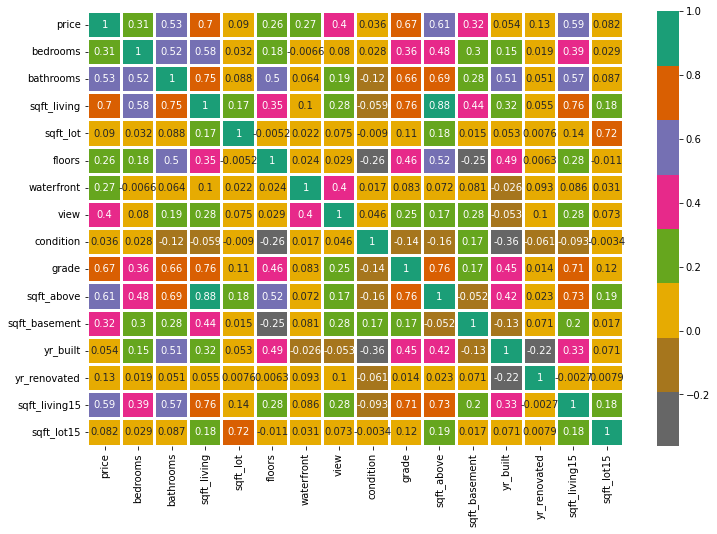

In [100]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [101]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [103]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [104]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(y_test)

y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)



In [108]:
ModeloLR = LinearRegression(fit_intercept=True)
ModeloLR.fit(X_train,y_train)
ModeloLR.coef_, ModeloLR.intercept_

(array([[-0.09808715,  0.08766871,  0.20426281,  0.0019498 ,  0.04692493,
          0.13295382,  0.08707801,  0.03799052,  0.38665787,  0.16969088,
          0.10626832, -0.2864496 ,  0.01470207,  0.05466431, -0.0412092 ]]),
 array([4.60255147e-16]))